# Python libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

# Loading the Data set 

In [2]:
data = pd.read_csv("weather_classification_data.csv")
data 

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


## Data Cleaning 

In [3]:
data.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [222]:
data.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_percent',
       'Cloud_Cover', 'Atmospheric_Pressure', 'UV_Index', 'Season',
       'Visibility_km', 'Location', 'Weather_Type'],
      dtype='object')

In [5]:
data.rename(columns={
    'Precipitation (%)': 'Precipitation_percent',
    'Atmospheric Pressure': 'Atmospheric_Pressure',
    'Visibility (km)': 'Visibility_km',
    'Cloud Cover': 'Cloud_Cover',
    'Weather Type': 'Weather_Type',
    'Wind Speed': 'Wind_Speed',
    'UV Index': 'UV_Index'
    
}, inplace=True)

## Encoding 

In [6]:
data_en = pd.get_dummies(data,columns=['Cloud_Cover','Season','Location'],drop_first=True) 

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Weather_Type'])
data_en['Weather_Type'] = le.transform(data_en['Weather_Type'])

In [8]:
for i, class_ in enumerate(le.classes_):
    print(f'{class_} is encoded as {i}')
    
inverse_transformed = list(le.inverse_transform([0, 1, 2, 3]))
print("Inverse Transformed:", inverse_transformed)

Cloudy is encoded as 0
Rainy is encoded as 1
Snowy is encoded as 2
Sunny is encoded as 3
Inverse Transformed: ['Cloudy', 'Rainy', 'Snowy', 'Sunny']


In [9]:
data_en

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km,Weather_Type,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,1,False,False,True,False,False,True,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,False,False,True,True,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,3,False,False,False,True,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,3,False,False,False,True,False,False,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,1,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,1,False,True,False,False,True,False,False,True
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,2,True,False,False,False,False,True,False,False
13197,30.0,77,5.5,28.0,1012.69,3,9.0,0,False,True,False,False,False,False,False,False
13198,3.0,76,10.0,94.0,984.27,0,2.0,2,False,True,False,False,False,True,True,False


In [223]:
data_en.dtypes

Temperature                  float64
Humidity                       int64
Wind_Speed                   float64
Precipitation_percent        float64
Atmospheric_Pressure         float64
UV_Index                       int64
Visibility_km                float64
Weather_Type                   int32
Cloud_Cover_cloudy              bool
Cloud_Cover_overcast            bool
Cloud_Cover_partly cloudy       bool
Season_Spring                   bool
Season_Summer                   bool
Season_Winter                   bool
Location_inland                 bool
Location_mountain               bool
dtype: object

## Standardize the numerical features

In [10]:
numerical_columns = ['Temperature', 'Humidity', 'Wind_Speed','Precipitation_percent','UV_Index','Visibility_km']
categorical_columns = [col for col in data.columns if col not in numerical_columns]

In [11]:
from sklearn.preprocessing import StandardScaler 

In [12]:
scaler = StandardScaler()

data_en_s = scaler.fit_transform(data_en[numerical_columns])

In [13]:
data_en_s

array([[-0.29493119,  0.21240351, -0.04808565,  0.88762913, -0.52010407,
        -0.58223095],
       [ 1.14303484,  1.35138482, -0.19283608,  0.54329086,  0.77642368,
         1.34576796],
       [ 0.62536707, -0.23328483, -0.40996172, -1.17840051,  0.25781258,
         0.01099948],
       ...,
       [ 0.62536707,  0.41048722, -0.62708737, -0.80275876, -0.26079852,
         1.04915274],
       [-0.92763624,  0.36096629,  0.02428956,  1.26327088, -1.03871517,
        -1.02715378],
       [-1.38778537, -1.52082893, -1.42321472,  1.20066392,  0.25781258,
         1.34576796]])

In [14]:
DS = pd.DataFrame(data_en_s, columns=numerical_columns, index=data_en.index)
onehotdf = data_en.drop(columns=numerical_columns)
DS = pd.concat([DS, onehotdf], axis=1)

In [15]:
DS

,Temperature,Humidity,Wind_Speed,Precipitation_percent,UV_Index,Visibility_km,Atmospheric_Pressure,Weather_Type,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,-0.520104,-0.582231,1010.82,1,False,False,True,False,False,True,True,False
1,1.143035,1.351385,-0.192836,0.543291,0.776424,1.345768,1011.43,0,False,False,True,True,False,False,True,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.257813,0.010999,1018.72,3,False,False,False,True,False,False,False,True
3,1.085516,0.707613,-1.206089,0.887629,0.776424,-1.323769,1026.25,3,False,False,False,True,False,False,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.779410,-0.878846,990.67,1,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.525006,0.261924,0.675666,0.543291,-0.779410,-1.323769,1003.15,1,False,True,False,False,True,False,False,True
13196,-1.157711,0.360966,-0.916588,-0.959276,-0.779410,0.159307,1067.23,2,True,False,False,False,False,True,False,False
13197,0.625367,0.410487,-0.627087,-0.802759,-0.260799,1.049153,1012.69,0,False,True,False,False,False,False,False,False
13198,-0.927636,0.360966,0.024290,1.263271,-1.038715,-1.027154,984.27,2,False,True,False,False,False,True,True,False


# Splitting The Data set 

## With out standardizing

In [16]:
Y  = data_en['Weather_Type']
X = data_en.drop('Weather_Type',axis=1)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [18]:
X_train.head()

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
9645,32.0,64,6.0,86.0,1007.86,0,3.0,False,True,False,False,False,False,False,False
8002,34.0,79,12.0,95.0,1000.16,2,3.5,False,True,False,True,False,False,True,False
6329,-4.0,83,37.5,72.0,991.22,3,1.0,False,False,True,False,False,True,True,False
11103,17.0,66,19.5,71.0,1017.39,0,4.0,False,True,False,True,False,False,False,True
3600,-3.0,86,3.0,82.0,996.59,1,4.0,False,True,False,False,False,True,False,True


In [19]:
train_set = pd.concat([X_train,Y_train],axis=1)
train_set

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather_Type
9645,32.0,64,6.0,86.0,1007.86,0,3.0,False,True,False,False,False,False,False,False,1
8002,34.0,79,12.0,95.0,1000.16,2,3.5,False,True,False,True,False,False,True,False,1
6329,-4.0,83,37.5,72.0,991.22,3,1.0,False,False,True,False,False,True,True,False,2
11103,17.0,66,19.5,71.0,1017.39,0,4.0,False,True,False,True,False,False,False,True,1
3600,-3.0,86,3.0,82.0,996.59,1,4.0,False,True,False,False,False,True,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,3.0,68,2.5,93.0,983.14,1,1.0,False,True,False,False,False,True,True,False,2
1344,24.0,98,11.5,63.0,1017.39,2,1.5,False,False,True,False,False,False,True,False,1
12815,24.0,73,7.5,82.0,1015.08,3,4.0,False,True,False,False,False,False,True,False,1
7293,19.0,33,14.0,18.0,1091.81,6,10.5,True,False,False,False,False,True,False,True,0


In [20]:
test_set = pd.concat([X_test,Y_test],axis=1)
test_set

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather_Type
11923,13.0,75,9.0,58.0,1000.52,1,3.0,False,False,True,False,True,False,True,False,1
2331,3.0,73,9.5,59.0,983.56,0,2.5,False,True,False,False,False,True,True,False,2
217,18.0,74,0.5,39.0,1007.53,1,8.5,False,True,False,False,False,False,False,True,0
1760,38.0,88,19.5,85.0,1009.03,0,4.5,False,False,True,True,False,False,True,False,0
3963,24.0,38,4.5,15.0,1029.37,9,7.0,False,False,True,True,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,-5.0,97,10.0,78.0,980.14,1,1.5,False,True,False,False,False,True,True,False,2
4515,24.0,56,8.5,48.0,1012.30,4,7.0,False,True,False,False,False,False,False,False,0
1996,12.0,89,6.5,86.0,992.27,2,1.5,False,True,False,False,True,False,False,False,1
1457,28.0,62,6.5,69.0,994.82,1,3.0,False,True,False,False,False,True,False,True,1


## With standardize

In [21]:
Ys  = DS['Weather_Type']
Xs = DS.drop('Weather_Type',axis=1)

In [22]:
Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(Xs, Ys, test_size=0.2, random_state=10)

In [23]:
train_set_s = pd.concat([Xs_train,Ys_train],axis=1)
train_set_s

,Temperature,Humidity,Wind_Speed,Precipitation_percent,UV_Index,Visibility_km,Atmospheric_Pressure,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather_Type
9645,0.740404,-0.233285,-0.554712,1.012843,-1.038715,-0.730539,1007.86,False,True,False,False,False,False,False,False,1
8002,0.855442,0.509529,0.313790,1.294574,-0.520104,-0.582231,1000.16,False,True,False,True,False,False,True,False,1
6329,-1.330267,0.707613,4.004926,0.574594,-0.260799,-1.323769,991.22,False,False,True,False,False,True,True,False,2
11103,-0.122375,-0.134243,1.399419,0.543291,-1.038715,-0.433923,1017.39,False,True,False,True,False,False,False,True,1
3600,-1.272748,0.856176,-0.988963,0.887629,-0.779410,-0.433923,996.59,False,True,False,False,False,True,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,-0.927636,-0.035201,-1.061339,1.231967,-0.779410,-1.323769,983.14,False,True,False,False,False,True,True,False,2
1344,0.280255,1.450427,0.241415,0.292863,-0.520104,-1.175461,1017.39,False,False,True,False,False,False,True,False,1
12815,0.280255,0.212404,-0.337587,0.887629,-0.260799,-0.433923,1015.08,False,True,False,False,False,False,True,False,1
7293,-0.007338,-1.768434,0.603291,-1.115794,0.517118,1.494076,1091.81,True,False,False,False,False,True,False,True,0


In [24]:
test_set_s = pd.concat([Xs_test,Ys_test],axis=1)
test_set_s

,Temperature,Humidity,Wind_Speed,Precipitation_percent,UV_Index,Visibility_km,Atmospheric_Pressure,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather_Type
11923,-0.352450,0.311445,-0.120461,0.136346,-0.779410,-0.730539,1000.52,False,False,True,False,True,False,True,False,1
2331,-0.927636,0.212404,-0.048086,0.167649,-1.038715,-0.878846,983.56,False,True,False,False,False,True,True,False,2
217,-0.064857,0.261924,-1.350840,-0.458420,-0.779410,0.900845,1007.53,False,True,False,False,False,False,False,True,0
1760,1.085516,0.955217,1.399419,0.981540,-1.038715,-0.285616,1009.03,False,False,True,True,False,False,True,False,0
3963,0.280255,-1.520829,-0.771838,-1.209704,1.295035,0.455922,1029.37,False,False,True,True,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,-1.387785,1.400906,0.024290,0.762415,-0.779410,-1.175461,980.14,False,True,False,False,False,True,True,False,2
4515,0.280255,-0.629452,-0.192836,-0.176689,-0.001493,0.455922,1012.30,False,True,False,False,False,False,False,False,0
1996,-0.409968,1.004738,-0.482337,1.012843,-0.520104,-1.175461,992.27,False,True,False,False,True,False,False,False,1
1457,0.510330,-0.332327,-0.482337,0.480684,-0.779410,-0.730539,994.82,False,True,False,False,False,True,False,True,1


In [25]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix

# K-Prototype Clustering

In [ ]:
YC  = data['Weather_Type']
XC = data.drop('Weather_Type',axis=1)

In [ ]:
XC_train, XC_test, YC_train, YC_test = train_test_split(XC, YC, test_size=0.2, random_state=10)

In [ ]:
train_set_C = pd.concat([XC_train,YC_train],axis=1)
test_set_C = pd.concat([XC_test,YC_test],axis=1)

In [214]:
categorical_columns = [col for col in data.columns if col not in numerical_columns and col != 'Weather_Type']
print("Categorical columns:", categorical_columns)

Categorical columns: ['Cloud_Cover', 'Atmospheric_Pressure', 'Season', 'Location']


In [220]:
categorical_indices = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical column indices:", categorical_indices)

Categorical column indices: ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']


In [226]:
data_en.select_dtypes(include=['object', 'category','bool']).columns.tolist()

['Cloud_Cover_cloudy',
 'Cloud_Cover_overcast',
 'Cloud_Cover_partly cloudy',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Location_inland',
 'Location_mountain']

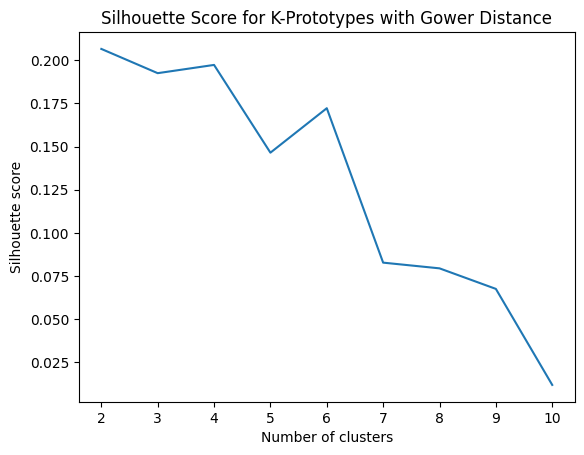

In [227]:
sampled_df = data_en.sample(n=1000, random_state=42)

from kmodes.kprototypes import KPrototypes

# Convert the DataFrame to a numpy array for k-prototypes
sampled_df_array = sampled_df.to_numpy()
categorical_features = data_en.select_dtypes(include=['object', 'category','bool']).columns.tolist()




import gower

# Compute Gower distance matrix
gower_dist = gower.gower_matrix(sampled_df)

# Use the distance matrix to calculate the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = list(range(2, 11))
silhouette_avg = []

for n_clusters in range_n_clusters:
    kproto = KPrototypes(n_clusters=n_clusters, random_state=42)
    cluster_labels = kproto.fit_predict(sampled_df_array, categorical=[sampled_df.columns.get_loc(col) for col in categorical_features])
    silhouette_avg.append(silhouette_score(gower_dist, cluster_labels, metric="precomputed"))

# Plotting silhouette scores
import matplotlib.pyplot as plt

plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Score for K-Prototypes with Gower Distance")
plt.show()

## FAMD

In [252]:
import prince
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [237]:
# Apply FAMD
famd = prince.FAMD(n_components=10, random_state=10)
famd = famd.fit(X_train)

# Transform the data
x_famd = famd.transform(X_train)

# Calculate explained variance from singular values
explained_variance_ratio = (famd.eigenvalues_ / famd.eigenvalues_.sum())[:5]
explained_variance_ratio



C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-2.202680013625275, -0.384968515044747, -1.6409473889596016, -1.5189771777965155, -1.8118141335538407, -1.3104692081291134, -0.15231794896123563, -0.1613743060919757, -0.16571699131990422, -0.1685499656158105, -0.18335055015577192, -0.15691147861521193, -0.14433756729740643, -0.14758151317256182, -0.15841305807823097, -0.1767766952966369, -0.16428218516819273, -0.18718407728190664, -0.17271231992693936, -0.17943514064131835, -0.16994874450132239, -0.1628347368197324, -0.15990053726670783, -0.17543236631680925, -0.1807497013703053, -0.2363709206336772, -0.25188681922039846, -0.22717801056627046, -0.2528249484237158, -0.23028309323591914, -0.23130885819351554, -0.2432809200504759, -0.2393567769390845, -0.23435921664027304, -0.24809883172443659, -0.3356924097137049, -0.32127822361575803, -0.3145764348029479, -0.332859511

array([0.20219964, 0.11154968, 0.10092107, 0.09511789, 0.08798654])

In [238]:
# Print transformed data
print(x_famd.head())
explained_variance_ratio
# Retrieve the eigenvalues
eigenvalues = famd.eigenvalues_

# Print the eigenvalues
print("Eigenvalues:", eigenvalues)


component         0         1         2         3         4         5  \
9645      -2.570414 -0.772417  0.332993 -2.573503 -1.696162 -1.266003   
8002      -0.831522  0.009644 -3.587037 -3.624219 -1.735611 -0.341823   
6329      -1.908812 -0.816289 -1.929570  1.306185 -0.521152  0.169706   
11103     -1.985706 -0.763424  3.793607 -4.057247 -3.268060  0.248668   
3600      -5.388917  0.032754  3.566628  1.279404  0.047049  0.139383   

component         6         7         8         9  
9645      -0.223398  1.122343 -2.752157  0.519022  
8002       1.813270 -2.428965 -2.103817 -0.742635  
6329       0.927261 -0.169094  1.174172  1.968387  
11103      1.995475  0.935748 -1.696169  0.649117  
3600      -2.162879  3.647040  0.889479 -3.197049  
Eigenvalues: [13.35080418  7.36538412  6.66359968  6.28042832  5.80956056  5.52816858
  5.37228262  5.28427171  5.21516373  5.15817102]


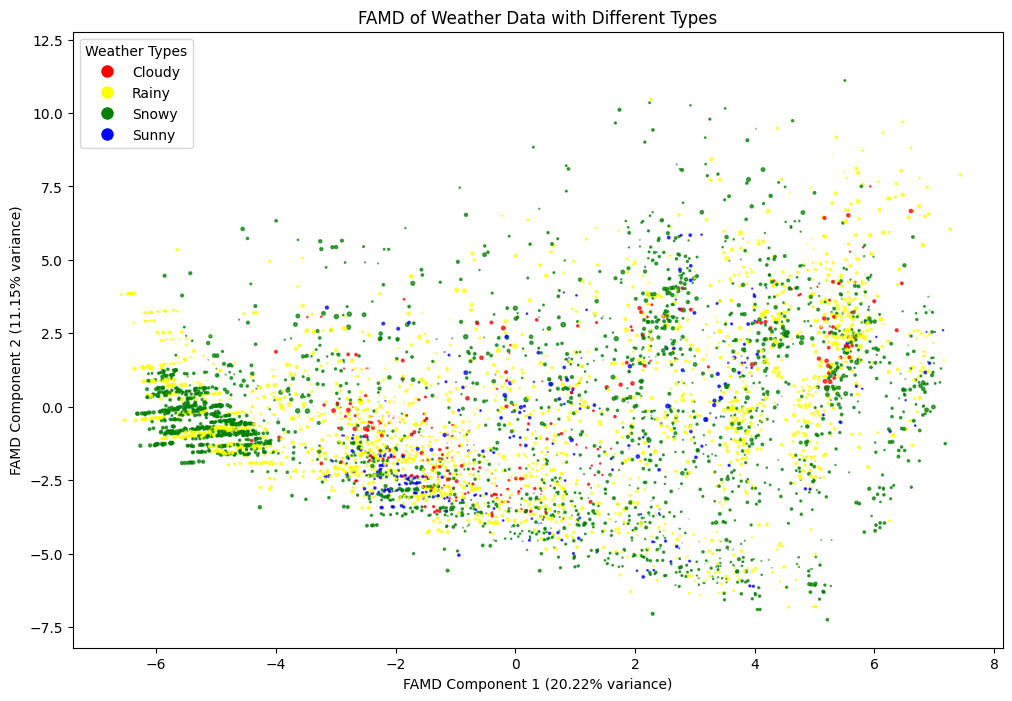

In [255]:
plt.figure(figsize=(12, 8))
colors = ['red', 'yellow', 'green', 'blue']
cmap = ListedColormap(colors)

# Increase dot size and change colors according to the weather type
scatter = plt.scatter(x_famd[0], x_famd[1],x_famd[2],x_famd[3], cmap=cmap, alpha=0.7)

# Adding labels for the axes
plt.xlabel(f'FAMD Component 1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'FAMD Component 2 ({explained_variance_ratio[1]*100:.2f}% variance)')
plt.title('FAMD of Weather Data with Different Types')


# Manually creating the legend to match the colors with labels
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Cloudy', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Rainy', markerfacecolor='yellow', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Snowy', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Sunny', markerfacecolor='blue', markersize=10)
]

plt.legend(handles=legend_elements, title="Weather Types")

# Save and show the plot
plt.savefig('FAMDScatterWeather.png', format='png')
plt.show()

In [256]:
col=famd.column_coordinates_
col

component,0,1,2,3,4,5,6,7,8,9
variable,,,,,,,,,,
Temperature,0.297642,0.000445,0.000105,1.313549e-02,4.099469e-03,0.002130,0.000437,0.000001,0.005680,0.000083
Wind_Speed,0.085175,0.003024,0.000010,4.704281e-04,2.285464e-02,0.000576,0.011996,0.000361,0.006837,0.001634
Precipitation_percent,0.365621,0.002051,0.000177,4.816301e-04,2.172382e-02,0.002094,0.018434,0.003958,0.003416,0.001738
Atmospheric_Pressure,0.057894,0.000153,0.000265,3.022928e-05,2.569610e-08,0.004334,0.000329,0.000003,0.000231,0.000022
Visibility_km,0.307229,0.014502,0.001634,3.595604e-07,1.818254e-03,0.002478,0.002260,0.003419,0.002233,0.000364
Cloud_Cover_cloudy,0.036058,0.121436,0.015636,9.517266e-03,6.546363e-03,0.121808,0.000574,0.000275,0.042482,0.000090
Cloud_Cover_overcast,0.576741,0.004639,0.002930,1.861750e-01,8.430148e-03,0.001013,0.003470,0.004037,0.000064,0.000072
Cloud_Cover_partly cloudy,0.160988,0.228804,0.048423,2.528980e-01,6.213519e-03,0.000075,0.009633,0.006818,0.000231,0.001279
Humidity,0.504670,0.457936,0.290361,2.566475e-01,4.489157e-01,0.564900,0.693614,0.741452,0.839722,0.884478


In [268]:
variable_names = col.index.tolist()

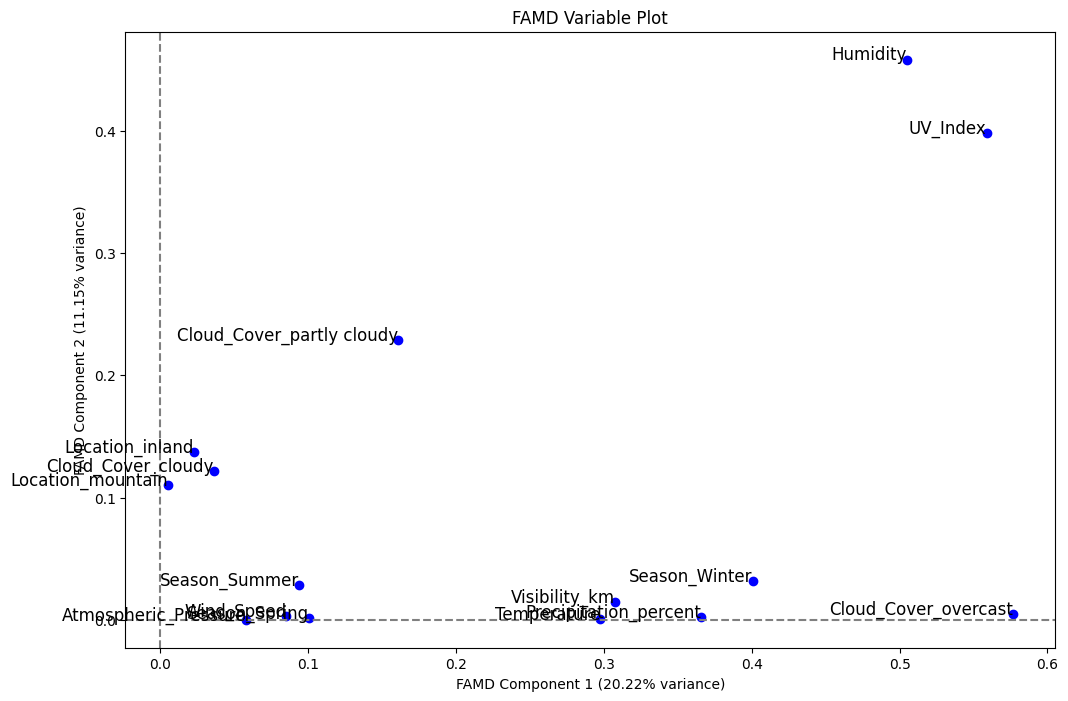

In [270]:
# Assuming 'col' contains the FAMD column coordinates
col = famd.column_coordinates_

plt.figure(figsize=(12, 8))

# Plotting the variables in the space of the first two components
plt.scatter(col[ 0], col[1], color='blue')

# Adding labels for the variables
for i, label in enumerate(variable_names):  # Replace 'variable_names' with the list of variable names
    plt.text(col.iloc[i, 0], col.iloc[i, 1], label, fontsize=12, ha='right')

# Adding labels for the axes
plt.xlabel(f'FAMD Component 1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'FAMD Component 2 ({explained_variance_ratio[1]*100:.2f}% variance)')
plt.title('FAMD Variable Plot')

# Draw lines to indicate the origin
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

# Show the plot
plt.savefig('FAMDVariablePlot.png', format='png')
plt.show()

In [272]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Number of clusters = 2,  silhouette score = 0.15117562690261419
Number of clusters = 3,  silhouette score = 0.13083927069759163
Number of clusters = 4,  silhouette score = 0.10642386090361856
Number of clusters = 5,  silhouette score = 0.11207595669271958
Number of clusters = 6,  silhouette score = 0.11610693439723765
Number of clusters = 7,  silhouette score = 0.1225257471311388
Number of clusters = 8,  silhouette score = 0.1275245994741389
Number of clusters = 9,  silhouette score = 0.1188677778056071
Number of clusters = 10,  silhouette score = 0.1227553672100315


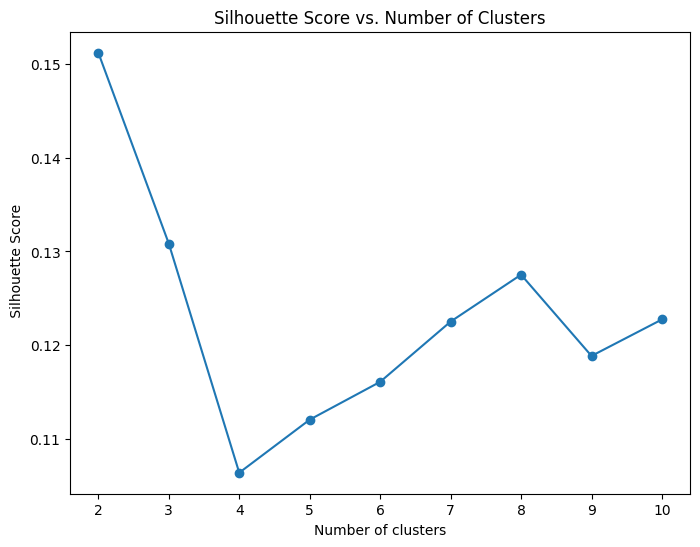

Optimal number of clusters: 2


In [282]:
# Apply K-means clustering
# Determine the optimal number of clusters
range_n_clusters = range(2, 11)  # Test a range of cluster numbers

silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    clusters = kmeans.fit_predict(x_famd)
    
    # Compute the average silhouette score
    silhouette_avg = silhouette_score(x_famd, clusters)
    silhouette_avg_scores.append(silhouette_avg)
    print(f'Number of clusters = {n_clusters},  silhouette score = {silhouette_avg}')

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel(' Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Identify the optimal number of clusters
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Multiple logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(random_state = 10,multi_class='multinomial')

In [27]:
param_grid_logi = {'solver': ['lbfgs', 'newton-cg','sag','saga'] ,'penalty':['None','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [28]:
grid_search_logi = GridSearchCV(estimator=logi_model, param_grid=param_grid_logi, cv=5, scoring='accuracy')

In [29]:
grid_search_logi.fit(Xs_train ,Ys_train)

C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=10),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['None', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [30]:
best_params_logi = grid_search_logi.best_params_
best_params_logi

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [31]:
best_logi_model = grid_search_logi.best_estimator_
best_logi_model

LogisticRegression(C=10, multi_class='multinomial', random_state=10,
                   solver='newton-cg')

In [32]:
y_pred_logit_train = best_logi_model.predict(Xs_train)

In [33]:
Accuracy_logi_train= accuracy_score(Ys_train, y_pred_logit_train)
Accuracy_logi_train

0.8709280303030303

In [34]:
y_pred = best_logi_model.predict(Xs_test)

In [35]:
Accuracy_logi= accuracy_score(Ys_test, y_pred)
Accuracy_logi

0.8723484848484848

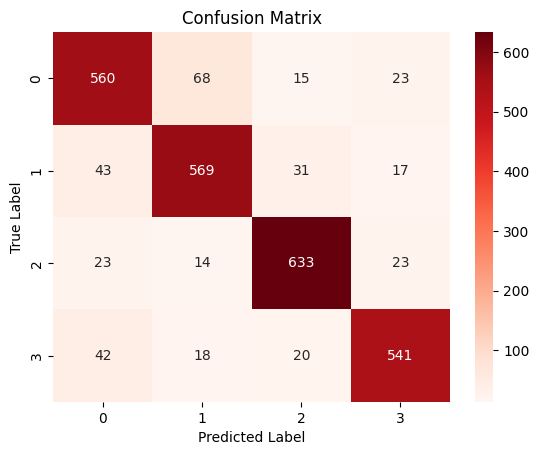

In [36]:
class_labels = ['0', '1', '2', '3']
conf_matrix_logi = confusion_matrix(Ys_test, y_pred)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
print(classification_report(Ys_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       666
           1       0.85      0.86      0.86       660
           2       0.91      0.91      0.91       693
           3       0.90      0.87      0.88       621

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



In [38]:
accuracy_score(Ys_test,y_pred)

0.8723484848484848

In [39]:
f1_score(Ys_test,y_pred,average='weighted')

0.8723812323782523

In [40]:
recall_score(Ys_test,y_pred,average='weighted')

0.8723484848484848

In [41]:
print(classification_report(Ys_train,y_pred_logit_train))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2634
           1       0.85      0.85      0.85      2640
           2       0.89      0.93      0.91      2607
           3       0.92      0.88      0.90      2679

    accuracy                           0.87     10560
   macro avg       0.87      0.87      0.87     10560
weighted avg       0.87      0.87      0.87     10560



In [42]:
accuracy_score(Ys_train,y_pred_logit_train)

0.8709280303030303

In [43]:
f1_score(Ys_train,y_pred_logit_train,average='weighted')

0.8709334026866252

In [44]:
recall_score(Ys_train,y_pred_logit_train,average='weighted')

0.8709280303030303

In [45]:
class_wise_accuracy = conf_matrix_logi.diagonal() / conf_matrix_logi.sum(axis=1)
print(class_wise_accuracy)

[0.84084084 0.86212121 0.91341991 0.87117552]


In [46]:
conf_matrix_logi_train = confusion_matrix(Ys_train,y_pred_logit_train)
class_wise_accuracy = conf_matrix_logi_train.diagonal() / conf_matrix_logi_train.sum(axis=1)
print(class_wise_accuracy)

[0.82801822 0.85037879 0.92865362 0.87719298]


# XG-Boost 

In [177]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='multi:softprob',random_state=10,booster='dart',alpha=5,gamma=1,sample_type='uniform',normalize_type='forest',rate_drop=0.1)

In [178]:
param_grid_xgb = {'learning_rate': [0.05, 0.1] ,'max_depth': [2, 3],'n_estimators': [50, 100],'lambda':[2.5,3],'subsample': [0.7, 0.8],'colsample_bytree': [0.7, 0.8]}

In [179]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_log_loss',n_jobs=-1)

In [180]:
grid_search_xgb.fit(X_train ,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(alpha=5, base_score=None, booster='dart',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=1, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     normalize_type='forest',
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'lambda': [2.5, 3],
                         'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'n_estimators': [50, 100], 'subsample': [0.7, 0.8]},
             scoring='neg_log_loss')

In [181]:
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb

{'colsample_bytree': 0.8,
 'lambda': 2.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.7}

In [182]:
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model

XGBClassifier(alpha=5, base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=2.5,
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, normalize_type='forest', num_parallel_tree=1,
              objective='multi:softprob', ...)

In [183]:
y_pred_xgb_train = best_xgb_model.predict(X_train)

In [184]:
Accuracy_xgb_train = accuracy_score(Y_train, y_pred_xgb_train )
Accuracy_xgb_train

0.9257575757575758

In [185]:
y_pred_xgb = best_xgb_model.predict(X_test)

In [186]:
Accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
Accuracy_xgb

0.906439393939394

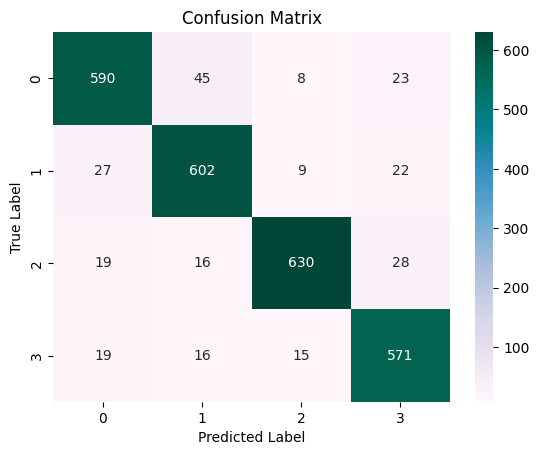

In [187]:
class_labels = ['0', '1', '2', '3']
conf_matrix_xgb = confusion_matrix(Y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='PuBuGn', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [188]:
print(classification_report(Y_train,y_pred_xgb_train ))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2634
           1       0.91      0.93      0.92      2640
           2       0.96      0.94      0.95      2607
           3       0.92      0.93      0.93      2679

    accuracy                           0.93     10560
   macro avg       0.93      0.93      0.93     10560
weighted avg       0.93      0.93      0.93     10560



In [189]:
print(classification_report(Y_test,y_pred_xgb ))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       666
           1       0.89      0.91      0.90       660
           2       0.95      0.91      0.93       693
           3       0.89      0.92      0.90       621

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [190]:
class_wise_accuracy = conf_matrix_xgb.diagonal() / conf_matrix_xgb.sum(axis=1)
print(class_wise_accuracy)

[0.88588589 0.91212121 0.90909091 0.9194847 ]


In [191]:
conf_matrix_xgb_train = confusion_matrix(Y_train,y_pred_xgb_train )
class_wise_accuracy = conf_matrix_xgb_train.diagonal() / conf_matrix_xgb_train.sum(axis=1)
print(class_wise_accuracy)

[0.90280942 0.93030303 0.93785961 0.9320642 ]


# Random Forest 

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=10)

In [63]:
param_grid_rf = {'criterion': ['gini','entropy'] ,'n_estimators': [25,35,45],'max_depth': [2,3,4]} 

In [64]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

In [65]:
grid_search_rf.fit(X_train ,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'n_estimators': [25, 35, 45]},
             scoring='accuracy')

In [66]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 45}

In [67]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=4, n_estimators=45, random_state=10)

In [68]:
y_pred_rf_train = best_rf_model.predict(X_train)

In [69]:
Accuracy_rf_train = accuracy_score(Y_train, y_pred_rf_train)
Accuracy_rf_train

0.9047348484848485

In [70]:
y_pred_rf = best_rf_model.predict(X_test)

In [71]:
Accuracy_rf = accuracy_score(Y_test, y_pred_rf)
Accuracy_rf

0.8950757575757575

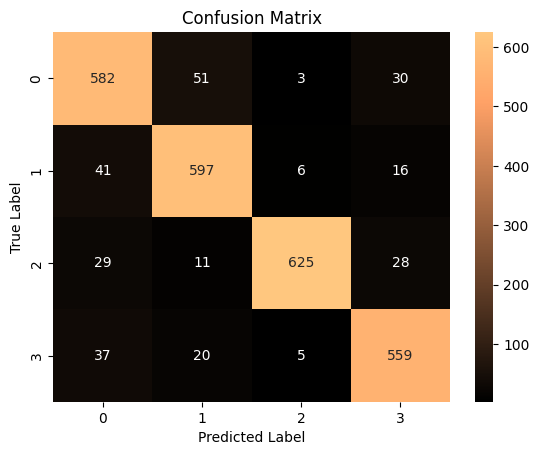

In [72]:
class_labels = ['0', '1', '2', '3']
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='copper', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [73]:
print(classification_report(Y_train,y_pred_rf_train ))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2634
           1       0.87      0.92      0.89      2640
           2       0.98      0.92      0.95      2607
           3       0.91      0.89      0.90      2679

    accuracy                           0.90     10560
   macro avg       0.91      0.90      0.91     10560
weighted avg       0.91      0.90      0.91     10560



In [74]:
accuracy_score(Y_train,y_pred_rf_train )

0.9047348484848485

In [75]:
f1_score(Y_train,y_pred_rf_train,average='weighted')

0.9051477702385825

In [76]:
precision_score(Y_train,y_pred_rf_train,average='weighted')

0.9064838443817369

In [77]:
recall_score(Y_train,y_pred_rf_train,average='weighted')

0.9047348484848485

In [78]:
print(classification_report(Y_test, y_pred_rf ))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       666
           1       0.88      0.90      0.89       660
           2       0.98      0.90      0.94       693
           3       0.88      0.90      0.89       621

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [79]:
f1_score(Y_test, y_pred_rf,average='weighted')

0.8956963414970139

In [80]:
precision_score(Y_test, y_pred_rf,average='weighted')

0.89738111328464

In [81]:
recall_score(Y_test, y_pred_rf,average='weighted')

0.8950757575757575

In [82]:
class_wise_accuracy = conf_matrix_rf.diagonal() / conf_matrix_rf.sum(axis=1)
print(class_wise_accuracy)

[0.87387387 0.90454545 0.9018759  0.90016103]


In [83]:
conf_matrix_logi_train = confusion_matrix(Y_train,y_pred_rf_train )
class_wise_accuracy = conf_matrix_logi_train.diagonal() / conf_matrix_logi_train.sum(axis=1)
print(class_wise_accuracy)

[0.88192863 0.92310606 0.91944764 0.89473684]


## SVM

In [152]:
from sklearn.svm import SVC
svm_model = SVC(random_state=10,probability=True)

In [154]:
param_grid_svm_K = {'C': [1,1.5,2,2.5,3,3.5],'gamma':['scale','auto',0.01,0.1],'decision_function_shape':['ovo','ovr'],'kernel':['rbf']} 

In [155]:
grid_search_svm = GridSearchCV(estimator=svm_model  , param_grid=param_grid_svm_K, scoring='accuracy', cv=5, n_jobs=-1)

In [156]:
grid_search_svm.fit(Xs_train,Ys_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=10), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [157]:
# Get the best parameters and model
best_svm_params = grid_search_svm.best_params_
best_svm_params 

{'C': 2.5, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [158]:
best_svm_model = grid_search_svm.best_estimator_
best_svm_model

SVC(C=2.5, decision_function_shape='ovo', gamma='auto', probability=True,
    random_state=10)

In [159]:
y_pred_svm_train = best_svm_model.predict(Xs_train)

In [160]:
Accuracy_svm_train = accuracy_score(Ys_train, y_pred_svm_train)
Accuracy_svm_train

0.9833333333333333

In [161]:
y_pred_svm = best_svm_model.predict(Xs_test)

In [162]:
Accuracy_svm = accuracy_score(Ys_test, y_pred_svm)
Accuracy_svm

0.9132575757575757

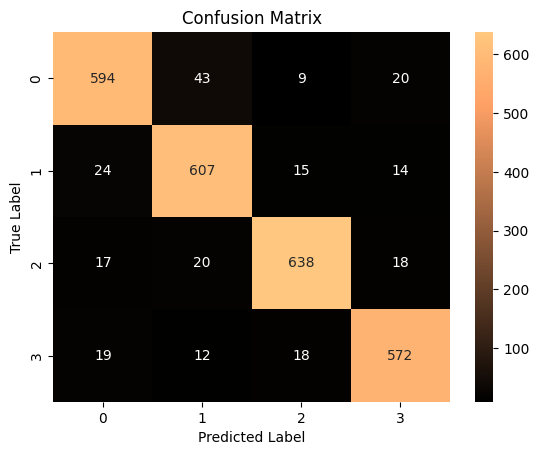

In [163]:
class_labels = ['0', '1', '2', '3']
conf_matrix_svm = confusion_matrix(Ys_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='copper', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [164]:
print(classification_report(Ys_train,y_pred_svm_train ))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2634
           1       0.97      0.99      0.98      2640
           2       1.00      1.00      1.00      2607
           3       1.00      0.99      0.99      2679

    accuracy                           0.98     10560
   macro avg       0.98      0.98      0.98     10560
weighted avg       0.98      0.98      0.98     10560



In [165]:
accuracy_score(Ys_train,y_pred_svm_train )

0.9833333333333333

In [166]:
f1_score(Ys_train,y_pred_svm_train,average='weighted')

0.9833484490042476

In [167]:
precision_score(Ys_train,y_pred_svm_train,average='weighted')

0.9834248312030627

In [168]:
recall_score(Y_train,y_pred_svm_train,average='weighted')

0.9833333333333333

In [169]:
print(classification_report(Ys_test, y_pred_svm ))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       666
           1       0.89      0.92      0.90       660
           2       0.94      0.92      0.93       693
           3       0.92      0.92      0.92       621

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [170]:
f1_score(Ys_test, y_pred_svm,average='weighted')

0.913299868815737

In [171]:
precision_score(Ys_test, y_pred_svm,average='weighted')

0.9135475364511538

In [172]:
recall_score(Ys_test, y_pred_svm,average='weighted')

0.9132575757575757

In [173]:
class_wise_accuracy = conf_matrix_svm.diagonal() / conf_matrix_svm.sum(axis=1)
print(class_wise_accuracy)

[0.89189189 0.91969697 0.92063492 0.92109501]


In [174]:
conf_matrix_logi_train = confusion_matrix(Ys_train,y_pred_svm_train )
class_wise_accuracy = conf_matrix_logi_train.diagonal() / conf_matrix_logi_train.sum(axis=1)
print(class_wise_accuracy)

[0.96772969 0.98522727 0.99539701 0.98506906]


# Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=10)

In [85]:
param_grid_gbm = {'learning_rate': [0.01, 0.1, 0.2] ,'max_depth': [2,3,4],'n_estimators': [20,25,30]}

In [86]:
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, cv=3, scoring='accuracy',n_jobs = -1, verbose = 1)

In [87]:
grid_search_gbm.fit(X_train,Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4], 'n_estimators': [20, 25, 30]},
             scoring='accuracy', verbose=1)

In [88]:
best_params_gbm = grid_search_gbm.best_params_
best_params_gbm

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 30}

In [89]:
best_gbm_model = grid_search_gbm.best_estimator_
best_gbm_model

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=30,
                           random_state=10)

In [90]:
y_pred_gbm_train = best_gbm_model.predict(X_train)

In [91]:
Accuracy_gbm_train = accuracy_score(Y_train, y_pred_gbm_train)
Accuracy_gbm_train

0.9637310606060606

In [92]:
y_pred_gbm = best_gbm_model.predict(X_test)

In [93]:
Accuracy_gbm = accuracy_score(Y_test, y_pred_gbm )
Accuracy_gbm

0.9087121212121212

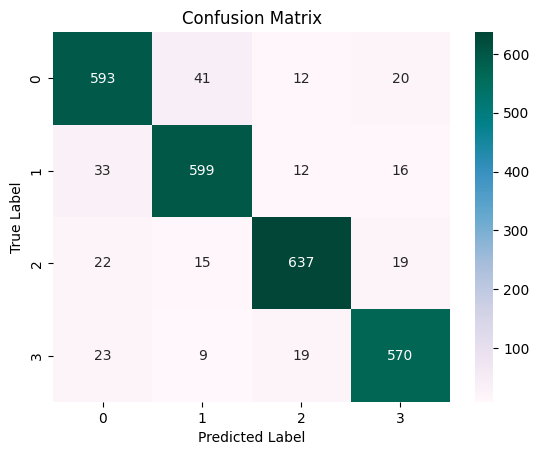

In [94]:
class_labels = ['0', '1', '2', '3']
conf_matrix_gbm = confusion_matrix(Y_test, y_pred_gbm)
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='PuBuGn', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [95]:
print(classification_report(Y_train,y_pred_gbm_train ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2634
           1       0.95      0.97      0.96      2640
           2       0.98      0.97      0.98      2607
           3       0.97      0.96      0.97      2679

    accuracy                           0.96     10560
   macro avg       0.96      0.96      0.96     10560
weighted avg       0.96      0.96      0.96     10560



In [96]:
accuracy_score(Y_train,y_pred_gbm_train )

0.9637310606060606

In [97]:
f1_score(Y_train,y_pred_gbm_train,average='weighted')

0.9637740734366633

In [98]:
precision_score(Y_train,y_pred_gbm_train,average='weighted')

0.9638759185122081

In [99]:
recall_score(Y_train,y_pred_gbm_train,average='weighted')

0.9637310606060606

In [100]:
print(classification_report(Y_test, y_pred_gbm ))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       666
           1       0.90      0.91      0.90       660
           2       0.94      0.92      0.93       693
           3       0.91      0.92      0.91       621

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [101]:
f1_score(Y_test, y_pred_gbm,average='weighted')

0.908778084701216

In [102]:
precision_score(Y_test, y_pred_gbm,average='weighted')

0.9089025490523343

In [103]:
recall_score(Y_test,y_pred_gbm,average='weighted')

0.9087121212121212

In [104]:
class_wise_accuracy = conf_matrix_gbm.diagonal() / conf_matrix_gbm.sum(axis=1)
print(class_wise_accuracy)

[0.89039039 0.90757576 0.91919192 0.9178744 ]


In [105]:
conf_matrix_gbm_train = confusion_matrix(Y_train,y_pred_gbm_train )
class_wise_accuracy = conf_matrix_gbm_train.diagonal() / conf_matrix_gbm_train.sum(axis=1)
print(class_wise_accuracy)

[0.95216401 0.96515152 0.97391638 0.96379246]


# ADA Boosting

In [106]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=10)

In [107]:
param_grid = {
    'n_estimators': [50, 60, 150, 185, 200],
    'learning_rate': [0.25,0.255,0.2552,0.2553,0.255,0.256,0.257 ],
    'algorithm': ['SAMME', 'SAMME.R']
}


In [108]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose=2)

In [109]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=10), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.25, 0.255, 0.2552, 0.2553, 0.255,
                                           0.256, 0.257],
                         'n_estimators': [50, 60, 150, 185, 200]},
             scoring='accuracy', verbose=2)

In [110]:
best_params_abm = grid_search.best_params_
best_params_abm

{'algorithm': 'SAMME', 'learning_rate': 0.256, 'n_estimators': 50}

In [111]:
best_abm_model = grid_search.best_estimator_
best_abm_model

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.256, random_state=10)

In [112]:
y_pred_abm_train = best_abm_model.predict(X_train)

In [113]:
Accuracy_abm_train = accuracy_score(Y_train, y_pred_gbm_train)
Accuracy_abm_train

0.9637310606060606

In [114]:
y_pred_abm = best_abm_model.predict(X_test)

In [115]:
Accuracy_adm = accuracy_score(Y_test, y_pred_abm)
Accuracy_adm

0.8689393939393939

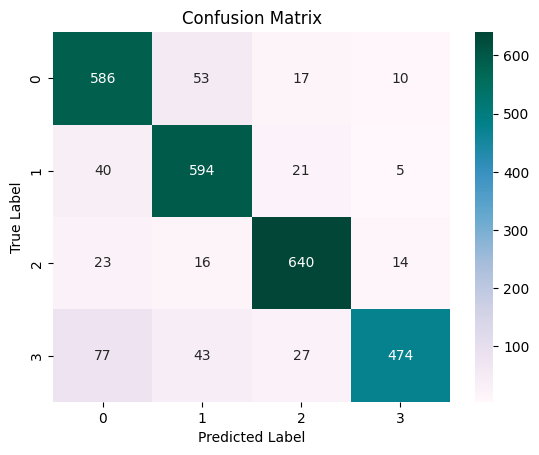

In [116]:
class_labels = ['0', '1', '2', '3']
conf_matrix_abm = confusion_matrix(Y_test, y_pred_abm)
sns.heatmap(conf_matrix_abm, annot=True, fmt='d', cmap='PuBuGn', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [117]:
print(classification_report(Y_train,y_pred_abm_train ))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2634
           1       0.84      0.92      0.87      2640
           2       0.92      0.93      0.93      2607
           3       0.96      0.74      0.84      2679

    accuracy                           0.87     10560
   macro avg       0.88      0.87      0.87     10560
weighted avg       0.88      0.87      0.87     10560



In [118]:
accuracy_score(Y_train,y_pred_abm_train )

0.868560606060606

In [119]:
f1_score(Y_train,y_pred_abm_train,average='weighted')

0.8681147482793218

In [120]:
precision_score(Y_train,y_pred_abm_train,average='weighted')

0.8771030602683775

In [121]:
recall_score(Y_train,y_pred_abm_train,average='weighted')

0.868560606060606

In [122]:
print(classification_report(Y_test, y_pred_abm ))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       666
           1       0.84      0.90      0.87       660
           2       0.91      0.92      0.92       693
           3       0.94      0.76      0.84       621

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



In [123]:
f1_score(Y_test, y_pred_abm,average='weighted')

0.8685630510065141

In [124]:
precision_score(Y_test, y_pred_abm,average='weighted')

0.8739283713723577

In [125]:
recall_score(Y_test,y_pred_abm,average='weighted')

0.8689393939393939

In [126]:
class_wise_accuracy = conf_matrix_abm.diagonal() / conf_matrix_abm.sum(axis=1)
print(class_wise_accuracy)

[0.87987988 0.9        0.92352092 0.76328502]


In [127]:
conf_matrix_abm_train = confusion_matrix(Y_train,y_pred_abm_train )
class_wise_accuracy = conf_matrix_abm_train.diagonal() / conf_matrix_abm_train.sum(axis=1)
print(class_wise_accuracy)

[0.88230828 0.9155303  0.93440736 0.74468085]


# Model Performance Comparisson

In [195]:
result = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression','SVC','XGBoostClassifier','GradientBoostClassifier','AdaBoostClassifier'],
    'Score': [Accuracy_rf, Accuracy_logi,Accuracy_xgb,Accuracy_svm,Accuracy_gbm,Accuracy_adm]
})
result

,Algorithm,Score
0,RandomForestClassifier,0.895076
1,LogisticRegression,0.872348
2,SVC,0.906439
3,XGBoostClassifier,0.913258
4,GradientBoostClassifier,0.908712
5,AdaBoostClassifier,0.868939


C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_3584\2701704331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Score', data=result, ax=ax,palette='viridis')
C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_3584\2701704331.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=result.Algorithm, rotation=45)


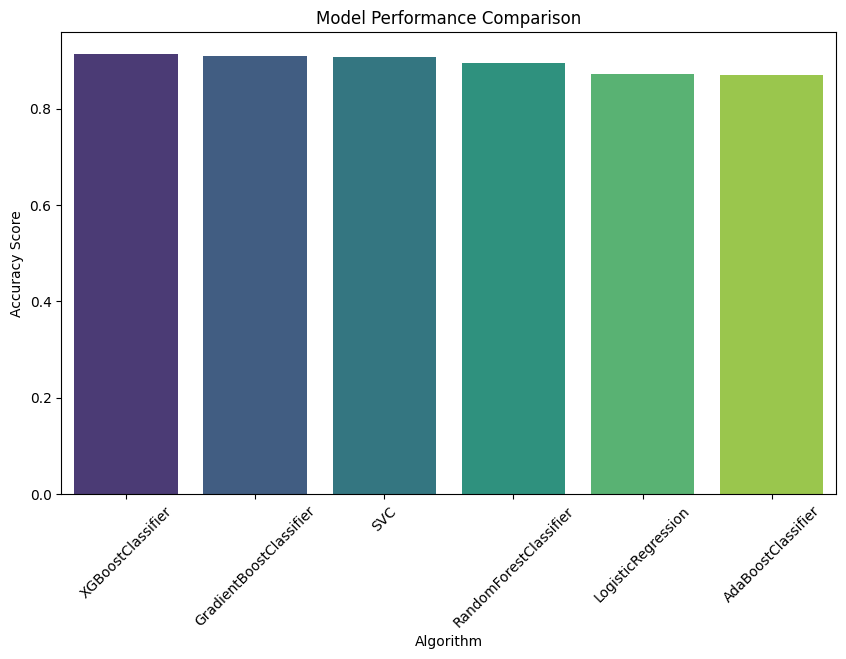

In [201]:
result.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax,palette='viridis')
ax.set_xticklabels(labels=result.Algorithm, rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

## Variable Importance 

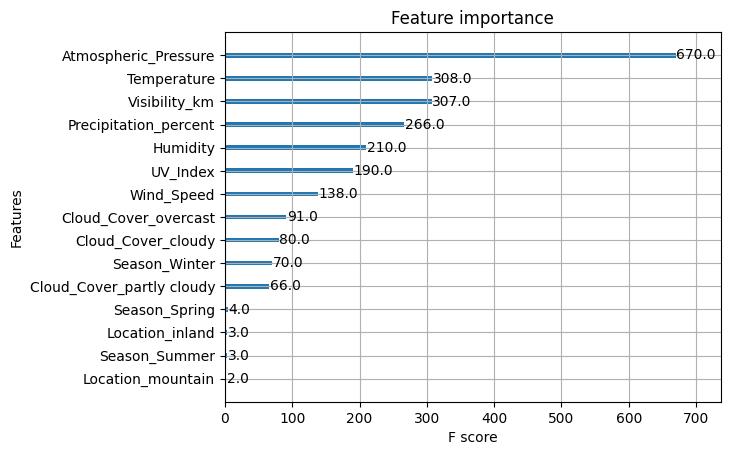

In [202]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(best_xgb_model)
pyplot.show()

In [203]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

thresholds = sort(best_xgb_model.feature_importances_)

for thresh in thresholds:
    selection = SelectFromModel(best_xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train.values)
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, Y_train)
    
    select_X_test = selection.transform(X_test.values)  
    y_pred = selection_model.predict(select_X_test)
    
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Y_test, predictions)
    
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))

Thresh=0.002, n=15, Accuracy: 90.98%
Thresh=0.003, n=14, Accuracy: 90.91%
Thresh=0.006, n=13, Accuracy: 90.87%
Thresh=0.016, n=12, Accuracy: 90.91%
Thresh=0.022, n=11, Accuracy: 90.57%
Thresh=0.023, n=10, Accuracy: 90.53%
Thresh=0.037, n=9, Accuracy: 89.96%
Thresh=0.041, n=8, Accuracy: 90.04%
Thresh=0.045, n=7, Accuracy: 89.77%
Thresh=0.061, n=6, Accuracy: 89.51%
Thresh=0.088, n=5, Accuracy: 86.93%
Thresh=0.095, n=4, Accuracy: 86.44%
Thresh=0.100, n=3, Accuracy: 72.46%
Thresh=0.191, n=2, Accuracy: 71.82%
Thresh=0.270, n=1, Accuracy: 58.71%


In [206]:
feature_names = best_xgb_model.feature_names_in_
for idx, name in enumerate(feature_names):
    print(f"Index: {idx}, Feature Name: {name}")

Index: 0, Feature Name: Temperature
Index: 1, Feature Name: Humidity
Index: 2, Feature Name: Wind_Speed
Index: 3, Feature Name: Precipitation_percent
Index: 4, Feature Name: Atmospheric_Pressure
Index: 5, Feature Name: UV_Index
Index: 6, Feature Name: Visibility_km
Index: 7, Feature Name: Cloud_Cover_cloudy
Index: 8, Feature Name: Cloud_Cover_overcast
Index: 9, Feature Name: Cloud_Cover_partly cloudy
Index: 10, Feature Name: Season_Spring
Index: 11, Feature Name: Season_Summer
Index: 12, Feature Name: Season_Winter
Index: 13, Feature Name: Location_inland
Index: 14, Feature Name: Location_mountain


# Partial Dependency

In [207]:
from sklearn import inspection
from sklearn.inspection import PartialDependenceDisplay

In [208]:
selected_features = ['Temperature', 'Atmospheric_Pressure', 'Precipitation_percent','Visibility_km']
selected_indices = [list(feature_names).index(name) for name in selected_features]
print("Selected feature indices:", selected_indices)

Selected feature indices: [0, 4, 3, 6]


In [209]:
target_classes = best_xgb_model.classes_
print("Target Classes:", target_classes)

Target Classes: [0 1 2 3]


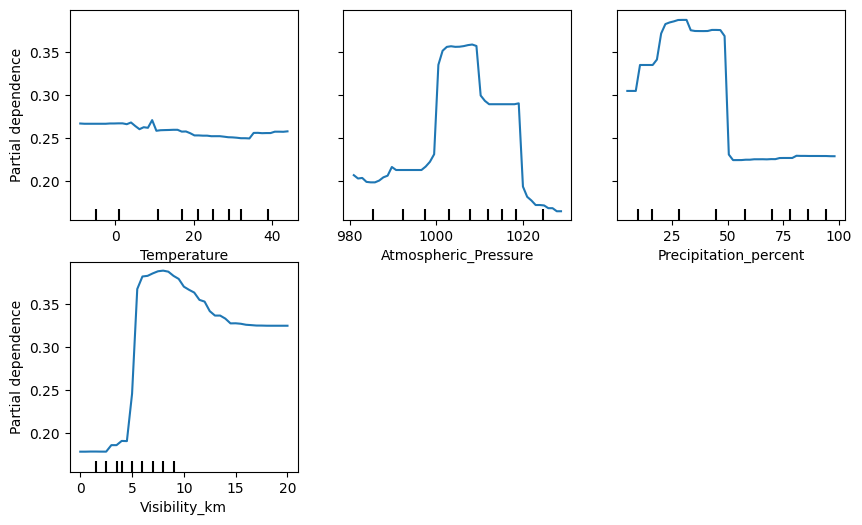

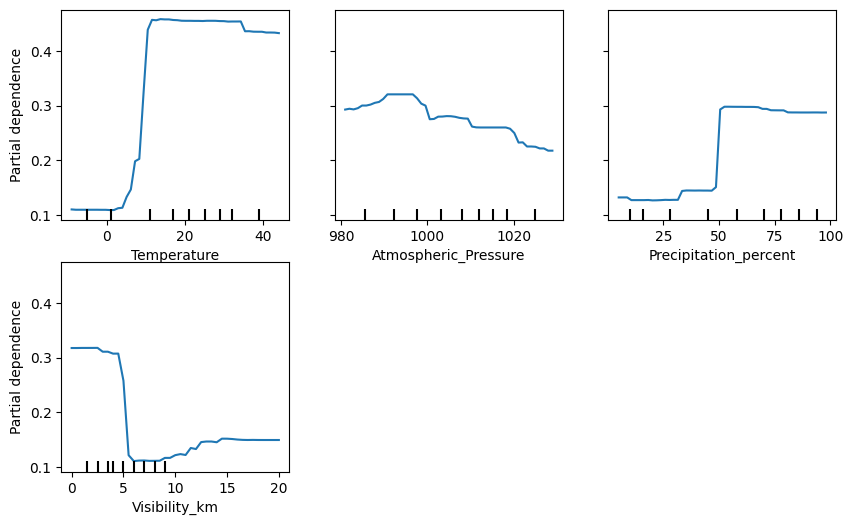

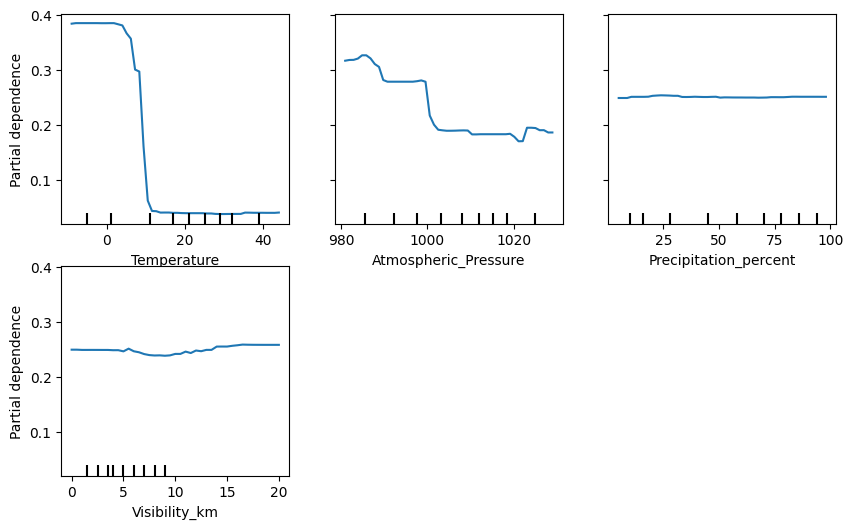

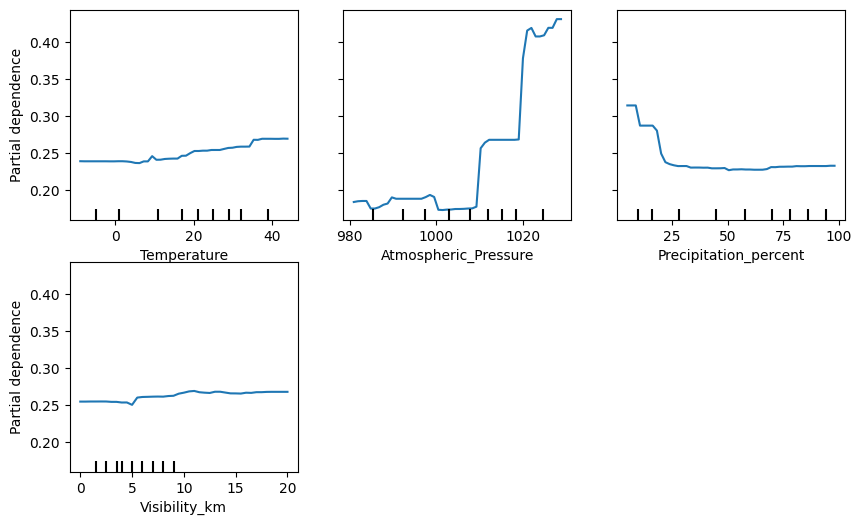

In [211]:
for target_class in target_classes:
    fig, ax = plt.subplots(figsize=(10, 6))
    PartialDependenceDisplay.from_estimator(
        estimator=best_xgb_model,
        X=X_train,
        features=selected_indices, 
        grid_resolution=50,
        target=target_class,
        ax=ax
    )
    
    plt.show()